In [60]:
%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [61]:
import pandas as pd
import numpy as np

In [62]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 37128
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc   337332 oct 26 16:45 03_ciclo_prueba_muestra_final.ipynb
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_seri

In [63]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [64]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [65]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [66]:
df_accs = pd.read_csv("datos_accs_madrid.csv")

In [67]:
len(df_accs)

252998

In [68]:
df_accs.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30


In [69]:
df_accs.shape

(252998, 11)

In [70]:
# Eliminamos la columna NUM_PERSONAS por se una variable acumulativa y no valer para serie temporal por falta de
# datos

In [71]:
#Filtro: Columnas que empiezan por xxx
filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
df_accs = df_accs.drop(columns=filtro_borrar)

In [72]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [73]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [74]:
df_accs.shape

(252998, 10)

In [75]:
type(df_accs)

pandas.core.frame.DataFrame

In [76]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [77]:
# Se cuenta con 19724 personas con edad sin identificar (NO_ASIGNADO)

In [78]:
pd.value_counts(df_accs['EDAD_APROX']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    233274
True      19724
Name: EDAD_APROX, dtype: int64

In [79]:
#df_accs["EDAD_APROX"] = df_accs["EDAD_APROX"].replace({"NO_ASIGNADO":0}, regex=True)
#df_accs["EDAD_APROX"] = df_accs["EDAD_APROX"].replace({"NO_ASIGNADO":''}, regex=True)

In [80]:
pd.value_counts(df_accs['EDAD_APROX']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    233274
True      19724
Name: EDAD_APROX, dtype: int64

In [81]:
df_accs.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [82]:
df_accs_lab = df_accs.copy()

In [83]:
df_accs.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [84]:
df_accs_lab.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [85]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [86]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if (col.startswith('FECHA')|
#                                            col.startswith('HORA'))]
# borrar columnas sobrantes:
#df_accs_lab = df_accs.drop(columns=filtro_borrar)


In [87]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [88]:
df_accs_lab.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [89]:
# No haría falta: df_accs_lab["EDAD_APROX"]=df_accs_lab['EDAD_APROX'].astype(np.int64)

In [90]:
df_accs_lab.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [91]:
# Etiquetamos mediante One Hot Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [92]:
df_accs_lab['FECHA']= lab.fit_transform(df_accs_lab['FECHA'])
df_accs_lab['HORA']= lab.fit_transform(df_accs_lab['HORA'])
df_accs_lab['DIA_SEMANA']= lab.fit_transform(df_accs_lab['DIA_SEMANA'])
df_accs_lab['DISTRITO']= lab.fit_transform(df_accs_lab['DISTRITO'])
df_accs_lab['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_lab['TIPO_ACCIDENTE'])
df_accs_lab['TIPO_VEHICULO']= lab.fit_transform(df_accs_lab['TIPO_VEHICULO'])
df_accs_lab['TIPO_PERSONA']= lab.fit_transform(df_accs_lab['TIPO_PERSONA'])
df_accs_lab['SEXO']= lab.fit_transform(df_accs_lab['SEXO'])
df_accs_lab['LESIVIDAD']= lab.fit_transform(df_accs_lab['LESIVIDAD'])
## Para escalabilizar los datos de la EDAD_APROX y poder incluirlos, los transformamos.
df_accs_lab['EDAD_APROX']= lab.fit_transform(df_accs_lab['EDAD_APROX'])

In [93]:
df_accs_lab.dtypes

FECHA             int64
HORA              int64
DIA_SEMANA        int64
DISTRITO          int64
TIPO_ACCIDENTE    int64
TIPO_VEHICULO     int64
TIPO_PERSONA      int64
SEXO              int64
LESIVIDAD         int64
EDAD_APROX        int64
dtype: object

In [94]:
df_accs.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [95]:
df_accs_lab.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,0,6,4,7,9,0,0,2,3


In [96]:
df_accs['FECHA'].unique()

array(['01/01/2010', '02/01/2010', '03/01/2010', ..., '29/12/2018',
       '30/12/2018', '31/12/2018'], dtype=object)

In [97]:
df_accs_lab['FECHA'].unique()

array([   0,  108,  216, ..., 3124, 3223, 3286])

In [98]:
df_accs['HORA'].unique()

array(['00:00', '01:00', '02:00', '04:00', '05:00', '08:00', '09:00',
       '20:00', '21:00', '06:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '18:00', '19:00', '22:00', '16:00', '17:00', '23:00',
       '07:00', '10:00', '03:00'], dtype=object)

In [99]:
df_accs_lab['HORA'].unique()

array([ 0,  1,  2,  4,  5,  8,  9, 20, 21,  6, 11, 12, 13, 14, 15, 18, 19,
       22, 16, 17, 23,  7, 10,  3])

In [100]:
df_accs['DIA_SEMANA'].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [101]:
df_accs_lab['DIA_SEMANA'].unique()

array([6, 5, 0, 2, 3, 4, 1])

In [102]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [103]:
df_accs_lab['DISTRITO'].unique()

array([ 4, 12,  5, 13, 14,  2,  6, 10, 16, 19, 11,  0, 15, 20,  8,  7, 18,
       17,  9,  1,  3])

In [104]:
df_accs['TIPO_ACCIDENTE'].unique()

array(['COLISION_DOBLE', 'COLISION_MULTIPLE', 'CHOQUE_CON_OBJETO_FIJO',
       'CAIDA_MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAIDA_CICLOMOTOR',
       'CAIDA_VIAJERO_ BUS', 'OTRAS_CAUSAS', 'CAIDA_BICICLETA',
       'CAIDA_VEHICULO_ 3_ RUEDAS'], dtype=object)

In [105]:
df_accs_lab['TIPO_ACCIDENTE'].unique()

array([ 7,  8,  6,  3,  0, 10,  2,  5,  9,  1,  4])

In [106]:
df_accs['TIPO_VEHICULO'].unique()

array(['TURISMO', 'NO_ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO_TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS_AUTOCAR', 'BICICLETA',
       'AMBULANCIA', 'VEH.3 RUEDAS'], dtype=object)

In [107]:
df_accs_lab['TIPO_VEHICULO'].unique()

array([ 9,  8,  6,  7,  2, 10,  4,  5,  1,  3,  0, 11])

In [108]:
df_accs['TIPO_PERSONA'].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [109]:
df_accs_lab['TIPO_PERSONA'].unique()

array([0, 3, 2, 1])

In [110]:
df_accs['SEXO'].unique()

array(['HOMBRE', 'MUJER', 'NO_ASIGNADO'], dtype=object)

In [111]:
df_accs_lab['SEXO'].unique()

array([0, 1, 2])

In [112]:
df_accs['LESIVIDAD'].unique()

array(['INGRESO_LEVE', 'HERIDO_LEVE', 'HERIDO_GRAVE', 'NO_ASIGNADO',
       'MUERTO'], dtype=object)

In [113]:
df_accs_lab['LESIVIDAD'].unique()

array([2, 1, 0, 4, 3])

In [114]:
df_accs['EDAD_APROX'].unique()

array(['20', '50', '40', '25', '30', '35', '65', '45', '0', 'NO_ASIGNADO',
       '70', '75', '10', '55', '15'], dtype=object)

In [115]:
df_accs_lab['EDAD_APROX'].unique()

array([ 3,  9,  7,  4,  5,  6, 11,  8,  0, 14, 12, 13,  1, 10,  2])

In [116]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [117]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [118]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [119]:
df_accs_lab.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,0,6,4,7,9,0,0,2,3
1,0,0,6,4,7,9,0,0,2,9
2,0,0,6,4,7,9,3,1,1,7


In [120]:
df_accs.count()

FECHA             252998
HORA              252998
DIA_SEMANA        252998
DISTRITO          252998
TIPO_ACCIDENTE    252998
TIPO_VEHICULO     252998
TIPO_PERSONA      252998
SEXO              252998
LESIVIDAD         252998
EDAD_APROX        252998
dtype: int64

In [121]:
df_accs_lab.count()

FECHA             252998
HORA              252998
DIA_SEMANA        252998
DISTRITO          252998
TIPO_ACCIDENTE    252998
TIPO_VEHICULO     252998
TIPO_PERSONA      252998
SEXO              252998
LESIVIDAD         252998
EDAD_APROX        252998
dtype: int64

In [63]:
%pylab inline
%matplotlib
plt.scatter(df_accs_lab['DISTRITO'],df_accs_lab['DIA_SEMANA'],c=df_accs_lab['DIA_SEMANA'])

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: Qt5Agg


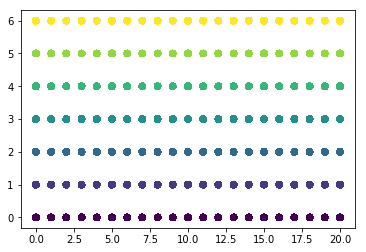

In [123]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# plot a graph 
plt.scatter(df_accs_lab['DISTRITO'],df_accs_lab['DIA_SEMANA'],c=df_accs_lab['DIA_SEMANA']) 
#plt.show() 

In [126]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

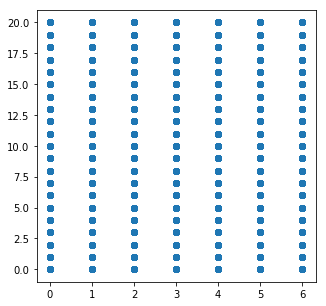

In [136]:
# plotting the various features (x) 
# against the labels (y). 
plt.figure(figsize=(5,5))
plt.scatter(df_accs_lab['DIA_SEMANA'], df_accs_lab['DISTRITO']) 

# saving the graph 
#plt.savefig('data_visualization.jpg')         
  
# displaying the graph 
plt.show() 

In [147]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [145]:
df_accs['DIA_SEMANA'].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [200]:
df_accs.groupby('DIA_SEMANA').count()

,FECHA,HORA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
DIA_SEMANA,,,,,,,,,
DOMINGO,27249,27249,27249,27249,27249,27249,27249,27249,27249
JUEVES,38794,38794,38794,38794,38794,38794,38794,38794,38794
LUNES,36301,36301,36301,36301,36301,36301,36301,36301,36301
MARTES,37707,37707,37707,37707,37707,37707,37707,37707,37707
MIERCOLES,38697,38697,38697,38697,38697,38697,38697,38697,38697
SABADO,30798,30798,30798,30798,30798,30798,30798,30798,30798
VIERNES,43452,43452,43452,43452,43452,43452,43452,43452,43452


In [328]:
df_accs.groupby('SEXO').count()

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,LESIVIDAD,EDAD_APROX
SEXO,,,,,,,,,
HOMBRE,160165,160165,160165,160165,160165,160165,160165,160165,160165
MUJER,80717,80717,80717,80717,80717,80717,80717,80717,80717
NO_ASIGNADO,12116,12116,12116,12116,12116,12116,12116,12116,12116


In [212]:
df_accs["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [229]:
df_accs_lab["DISTRITO"].unique()

array([ 4, 12,  5, 13, 14,  2,  6, 10, 16, 19, 11,  0, 15, 20,  8,  7, 18,
       17,  9,  1,  3])

In [330]:
df_accs.groupby('DIA_SEMANA').count()[['DISTRITO']]

,DISTRITO
DIA_SEMANA,
DOMINGO,27249
JUEVES,38794
LUNES,36301
MARTES,37707
MIERCOLES,38697
SABADO,30798
VIERNES,43452


In [226]:
df_accs[df_accs.DISTRITO == 'CHAMARTIN'].groupby(['DIA_SEMANA']).count()

,FECHA,HORA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
DIA_SEMANA,,,,,,,,,
DOMINGO,1676,1676,1676,1676,1676,1676,1676,1676,1676
JUEVES,3145,3145,3145,3145,3145,3145,3145,3145,3145
LUNES,2635,2635,2635,2635,2635,2635,2635,2635,2635
MARTES,2944,2944,2944,2944,2944,2944,2944,2944,2944
MIERCOLES,3076,3076,3076,3076,3076,3076,3076,3076,3076
SABADO,2065,2065,2065,2065,2065,2065,2065,2065,2065
VIERNES,3316,3316,3316,3316,3316,3316,3316,3316,3316


In [331]:
df_accs[df_accs.SEXO == 'HOMBRE'].groupby(['DIA_SEMANA']).count()

,FECHA,HORA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
DIA_SEMANA,,,,,,,,,
DOMINGO,16867,16867,16867,16867,16867,16867,16867,16867,16867
JUEVES,24722,24722,24722,24722,24722,24722,24722,24722,24722
LUNES,22993,22993,22993,22993,22993,22993,22993,22993,22993
MARTES,24011,24011,24011,24011,24011,24011,24011,24011,24011
MIERCOLES,24572,24572,24572,24572,24572,24572,24572,24572,24572
SABADO,19263,19263,19263,19263,19263,19263,19263,19263,19263
VIERNES,27737,27737,27737,27737,27737,27737,27737,27737,27737


In [341]:
df_accs[df_accs.SEXO == 'HOMBRE'].groupby(df_accs.DIA_SEMANA == 'VIERNES').count()

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
DIA_SEMANA,,,,,,,,,,
False,132428,132428,132428,132428,132428,132428,132428,132428,132428,132428
True,27737,27737,27737,27737,27737,27737,27737,27737,27737,27737


In [230]:
df_accs_lab[df_accs_lab.DISTRITO == 4].groupby(['DIA_SEMANA']).count()

,FECHA,HORA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
DIA_SEMANA,,,,,,,,,
0,1676,1676,1676,1676,1676,1676,1676,1676,1676
1,3145,3145,3145,3145,3145,3145,3145,3145,3145
2,2635,2635,2635,2635,2635,2635,2635,2635,2635
3,2944,2944,2944,2944,2944,2944,2944,2944,2944
4,3076,3076,3076,3076,3076,3076,3076,3076,3076
5,2065,2065,2065,2065,2065,2065,2065,2065,2065
6,3316,3316,3316,3316,3316,3316,3316,3316,3316


In [64]:
##################################### INICIO

In [233]:
df_accs_lab["DISTRITO"].values

array([4, 4, 4, ..., 8, 8, 8])

In [235]:
df_accs_lab["DISTRITO"]

0          4
1          4
2          4
3         12
4         12
          ..
252993    14
252994    14
252995     8
252996     8
252997     8
Name: DISTRITO, Length: 252998, dtype: int64

In [238]:
df_accs_lab[['DISTRITO']]

,DISTRITO
0,4
1,4
2,4
3,12
4,12
...,...
252993,14
252994,14
252995,8
252996,8


In [315]:
#df_accs[df_accs.SEXO == 'HOMBRE'].groupby(df_accs.DIA_SEMANA == 'VIERNES').count()
#df_accs_lab = df_accs.copy()

In [316]:
# Etiquetamos mediante One Hot Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

df_accs_lab['FECHA']= lab.fit_transform(df_accs_lab['FECHA'])
df_accs_lab['HORA']= lab.fit_transform(df_accs_lab['HORA'])
df_accs_lab['DIA_SEMANA']= lab.fit_transform(df_accs_lab['DIA_SEMANA'])
df_accs_lab['DISTRITO']= lab.fit_transform(df_accs_lab['DISTRITO'])
df_accs_lab['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_lab['TIPO_ACCIDENTE'])
df_accs_lab['TIPO_VEHICULO']= lab.fit_transform(df_accs_lab['TIPO_VEHICULO'])
df_accs_lab['TIPO_PERSONA']= lab.fit_transform(df_accs_lab['TIPO_PERSONA'])
df_accs_lab['SEXO']= lab.fit_transform(df_accs_lab['SEXO'])
df_accs_lab['LESIVIDAD']= lab.fit_transform(df_accs_lab['LESIVIDAD'])
## Para escalabilizar los datos de la EDAD_APROX y poder incluirlos, los transformamos.
df_accs_lab['EDAD_APROX']= lab.fit_transform(df_accs_lab['EDAD_APROX'])

In [319]:
# Según DISTRITO
#X = df_accs_lab[["DISTRITO"]].values
X = df_accs_lab[['DIA_SEMANA']]
y = df_accs_lab["DISTRITO"]

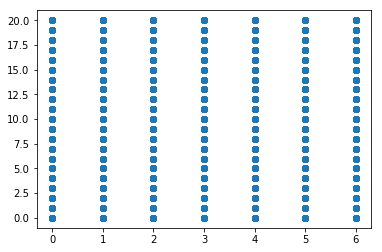

In [320]:
plt.scatter(X,y)

In [321]:
from sklearn.linear_model import LinearRegression

In [322]:
reg = LinearRegression()

In [323]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
reg.coef_

array([0.02103377])

In [325]:
reg.predict([[0],[4]])

array([9.02653395, 9.11066905])

In [312]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [314]:
y_train

64776     6
1193      1
191862    6
58935     6
120825    6
         ..
187650    2
2298      0
60643     5
159941    5
82767     3
Name: DIA_SEMANA, Length: 169508, dtype: int64

In [308]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
###############

In [310]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.1719247814109474

In [311]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring='accuracy').mean()

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1717483932893967

In [270]:
###############

In [282]:
# Import library
from sklearn.tree import DecisionTreeClassifier
# Create instance
clf = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)
# Fit the data
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [283]:
pred = clf.predict_proba(X_test)

In [284]:
pred

array([[0.10281901, 0.15437269, 0.14684114, ..., 0.15409807, 0.11673555,
        0.17503124],
       [0.14185853, 0.14839992, 0.13544539, ..., 0.13685628, 0.14801513,
        0.15006734],
       [0.14185853, 0.14839992, 0.13544539, ..., 0.13685628, 0.14801513,
        0.15006734],
       ...,
       [0.10281901, 0.15437269, 0.14684114, ..., 0.15409807, 0.11673555,
        0.17503124],
       [0.10281901, 0.15437269, 0.14684114, ..., 0.15409807, 0.11673555,
        0.17503124],
       [0.10281901, 0.15437269, 0.14684114, ..., 0.15409807, 0.11673555,
        0.17503124]])

In [285]:
###############

In [288]:
# Load the library
from sklearn.metrics import roc_curve
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,pred[:,target_pos])
plt.plot(fp,tp)
plt.xlabel("false_positives")
plt.ylabel("true_positives")

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import auc
auc(fp,tp)

In [281]:
###############

In [267]:
# Prueba de prediccon manual (ej: xa CHAMARTIN)
clf.predict([[4]])

array([6])

In [81]:
# Clasification matrics:
## Classification Accuracy.
## Logarithmic Loss.
## Area Under ROC Curve.
## Confusion Matrix.
## Classification Report.

In [83]:
# Análisis exploratorio, para comprobar el desequilibrio entre las clases

In [84]:
df_accs_lab.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,0,6,4,7,9,0,0,2,3
1,0,0,6,4,7,9,0,0,2,9
2,0,0,6,4,7,9,3,1,1,7


In [85]:
print(df_accs_lab.shape)
print(pd.value_counts(df_accs_lab['DIA_SEMANA'], sort = True))
print(pd.value_counts(df_accs_lab['DISTRITO'], sort = True))

(252998, 10)
6    43452
1    38794
4    38697
3    37707
2    36301
5    30798
0    27249
Name: DIA_SEMANA, dtype: int64
14    19269
4     18857
3     17717
6     16580
12    16180
2     15593
5     14466
7     13750
13    13665
16    13626
10    13587
0     13050
9     12218
15    11987
17     8808
8      8546
20     6708
11     6246
19     5601
1      3402
18     3142
Name: DISTRITO, dtype: int64


In [92]:
# Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: mean/std: ", results.mean(), results.std())

Accuracy: mean/std:  0.17174840434099864 0.005064044464710436


In [94]:
# Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of 
# membership to a given class.
# Cross Validation Classification Accuracy
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("Logloss: mean/std: ", results.mean(), results.std())

Logloss: mean/std:  -1.9360220281380613 0.0013559592311403585


In [96]:
# MULTICLASS IS NOT VALID
# Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
#scoring = 'roc_auc'
#results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
#print("AUC: mean/std: ", results.mean(), results.std())

In [ ]:
# The confusion matrix is a handy presentation of the accuracy of a model with two or more classes

In [97]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [210]:
# Según DIA_SEMANA
# Tot: X = df_accs_lab[['FECHA','HORA','DISTRITO','TIPO_ACCIDENTE','TIPO_VEHICULO','TIPO_PERSONA','SEXO','LESIVIDAD','EDAD_APROX']].values
# SubTot 1:
#X = df_accs_lab[['FECHA']].values
# SubTot 2:
#X = df_accs_lab[['HORA']].values
# SubTot 3:
#X = df_accs_lab[['DISTRITO']].values
# SubTot 4:
#X = df_accs_lab[['TIPO_ACCIDENTE']].values
# SubTot 5:
#X = df_accs_lab[['TIPO_VEHICULO']].values
# SubTot 6:
#X = df_accs_lab[['TIPO_PERSONA']].values
# SubTot 7:
#X = df_accs_lab[['SEXO']].values
# SubTot 8:
#X = df_accs_lab[['LESIVIDAD']].values
# SubTot 9:
#X = df_accs_lab[['EDAD_APROX']].values
# SubTot 10:
X = df_accs_lab[['FECHA','HORA','DISTRITO','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values

y = df_accs_lab["DIA_SEMANA"]

In [204]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [205]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
# Cross Validation Classification Confusion Matrix
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [207]:
df_accs["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [208]:
df_accs_lab["DIA_SEMANA"].unique()

array([6, 5, 0, 2, 3, 4, 1])

In [209]:
# Predicciones: en x
# Resultados predicciones: en y
predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print("DIA_SEMANA x FECHA-HORA-DISTRITO-EDAD_APROX-LESIVIDAD-TIPO_ACCIDENTE-SEXO-TIPO_VEHICULO-TIPO_PERSONA")
print(matrix)

DIA_SEMANA x FECHA-HORA-DISTRITO-EDAD_APROX-LESIVIDAD-TIPO_ACCIDENTE-SEXO-TIPO_VEHICULO-TIPO_PERSONA
[[  870     1     4    61   270   672  7007]
 [  441     4     9    84   394   561 11438]
 [  450     4     3    52   404   524 10298]
 [  366     3     5    90   407   532 11076]
 [  413     2    12    98   366   562 11421]
 [  839     1     8    85   274   755  8198]
 [  584     2    12    90   416   702 12620]]


In [211]:
# Según DISTRITO
# Tot: X = df_accs_lab[['FECHA','HORA','DISTRITO','TIPO_ACCIDENTE','TIPO_VEHICULO','TIPO_PERSONA','SEXO','LESIVIDAD','EDAD_APROX']].values
# SubTot 1:
#X = df_accs_lab[['FECHA']].values
# SubTot 2:
#X = df_accs_lab[['HORA']].values
# SubTot 3:
#X = df_accs_lab[['DISTRITO']].values
# SubTot 4:
#X = df_accs_lab[['TIPO_ACCIDENTE']].values
# SubTot 5:
#X = df_accs_lab[['TIPO_VEHICULO']].values
# SubTot 6:
#X = df_accs_lab[['TIPO_PERSONA']].values
# SubTot 7:
#X = df_accs_lab[['SEXO']].values
# SubTot 8:
#X = df_accs_lab[['LESIVIDAD']].values
# SubTot 9:
#X = df_accs_lab[['EDAD_APROX']].values
# SubTot 10:
X = df_accs_lab[['FECHA','HORA','DIA_SEMANA','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values

y = df_accs_lab["DISTRITO"]

In [212]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [214]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
# Cross Validation Classification Confusion Matrix
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [216]:
df_accs["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [217]:
df_accs_lab["DIA_SEMANA"].unique()

array([6, 5, 0, 2, 3, 4, 1])

In [222]:
# Predicciones: en x
# Resultados predicciones: en y
predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print("DISTRITO x FECHA-HORA-DIA_SEMANA-DISTRITO-EDAD_APROX-LESIVIDAD-TIPO_ACCIDENTE-SEXO-TIPO_VEHICULO-TIPO_PERSONA")
print(matrix)

DISTRITO x FECHA-HORA-DIA_SEMANA-DISTRITO-EDAD_APROX-LESIVIDAD-TIPO_ACCIDENTE-SEXO-TIPO_VEHICULO-TIPO_PERSONA
[[   0    0   24  643 1366    0  111   20    0    0   16    0  902    5
  1257    0    0    0    0    0    0]
 [   0    0   11  211  334    0   45   10    0    0    0    0  223    1
   280    0    0    0    0    0    0]
 [   0    0   72  833 1626    0  191   19    0    0    9    0 1201   11
  1164    0    0    0    0    0    0]
 [   0    0   78 1319 1586    0  108   20    0    0   12    0 1037   10
  1578    0    0    0    0    0    0]
 [   0    0   50  896 2076    0  170   23    0    0   21    0 1151    7
  1842    0    0    0    0    0    0]
 [   0    0   46  872 1440    1  160   20    0    0   17    0  867    6
  1317    0    0    0    0    0    0]
 [   0    0   59  797 1771    1  242   25    0    0   23    0 1112    8
  1448    0    0    0    0    0    0]
 [   0    0   40  704 1475    0  168   18    0    0   14    0 1042   11
  1120    0    0    0    0    0    0]
 [   0    

In [224]:
# CLASIFICATION REPORT
# The classification_report() function displays the precision, recall, f1-score and support for each class.

In [225]:
# Según DISTRITO
# Tot: X = df_accs_lab[['FECHA','HORA','DISTRITO','TIPO_ACCIDENTE','TIPO_VEHICULO','TIPO_PERSONA','SEXO','LESIVIDAD','EDAD_APROX']].values
# SubTot 1:
#X = df_accs_lab[['FECHA']].values
# SubTot 2:
#X = df_accs_lab[['HORA']].values
# SubTot 3:
#X = df_accs_lab[['DISTRITO']].values
# SubTot 4:
#X = df_accs_lab[['TIPO_ACCIDENTE']].values
# SubTot 5:
#X = df_accs_lab[['TIPO_VEHICULO']].values
# SubTot 6:
#X = df_accs_lab[['TIPO_PERSONA']].values
# SubTot 7:
#X = df_accs_lab[['SEXO']].values
# SubTot 8:
#X = df_accs_lab[['LESIVIDAD']].values
# SubTot 9:
#X = df_accs_lab[['EDAD_APROX']].values
# SubTot 10:
X = df_accs_lab[['FECHA','HORA','DISTRITO','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values

y = df_accs_lab["DIA_SEMANA"]

In [226]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [227]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
# Cross Validation Classification Report
predicted = clf.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.27      0.05      0.08      9095
           1       0.14      0.00      0.00     12705
           2       0.00      0.00      0.00     11907
           3       0.15      0.02      0.03     12502
           4       0.16      0.07      0.09     12777
           5       0.19      0.12      0.14     10085
           6       0.18      0.84      0.29     14419

    accuracy                           0.18     83490
   macro avg       0.16      0.15      0.09     83490
weighted avg       0.15      0.18      0.09     83490



/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [264]:
##################################################
# Regression Metrics
##################################################
# 1. Mean Absolute Error
# 2. Mean Squared Error
# 3. R^2 Metric

In [232]:
# 1. Mean Absolute Error: The Mean Absolute Error (or MAE) is the average of the absolute differences 
# between predictions and actual values. It gives an idea of how wrong the predictions were.

In [233]:
X = df_accs_lab[['FECHA','HORA','DISTRITO','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values
y = df_accs_lab["DIA_SEMANA"]

In [234]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [235]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
# 1. Mean Absolute Error: The Mean Absolute Error (or MAE) is the average of the absolute differences 
# between predictions and actual values. It gives an idea of how wrong the predictions were.
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("MAE: mean/std: ", results.mean(), results.std())

MAE: mean/std:  -2.7437846794238148 0.03161705792157683


In [244]:
# 2. Mean Squared Error:
# The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides 
# a gross idea of the magnitude of error.

In [256]:
#X = df_accs_lab[['FECHA','HORA','DISTRITO','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values
X = df_accs_lab[['DISTRITO']].values
y = df_accs_lab["DIA_SEMANA"]

In [257]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [258]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
# 2. Mean Squared Error:
# The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides 
# a gross idea of the magnitude of error.
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("MSE: mean/std: ", results.mean(), results.std())

MSE: mean/std:  -11.270097808080964 0.1908704224859224


In [255]:
# RMSE: absolut value + square root
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = clf.predict(X_test)
results = sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: ", results)

RMSE:  3.3665656866749725


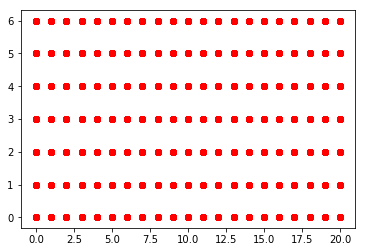

KeyError: 0

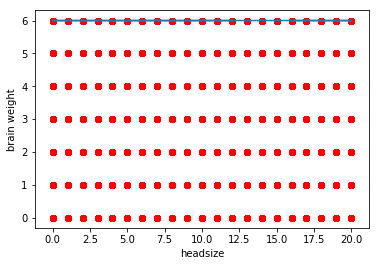

In [263]:
#predict the test result
y_pred=clf.predict(X_test)

#to see the relationship between the training data values
plt.scatter(X_train,y_train,c='red')
plt.show()

#to see the relationship between the predicted 
#brain weight values using scattered graph
plt.plot(X_test,y_pred)   
plt.scatter(X_test,y_test,c='red')
plt.xlabel('headsize')
plt.ylabel('brain weight')

#errorin each value
for i in range(0,60):
    print("Error in value number",i,(y_test[i]-y_pred[i]))

time.sleep(1)

#combined rmse value
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))


In [266]:
X = df_accs_lab[['FECHA','HORA','DISTRITO','EDAD_APROX', 'LESIVIDAD','TIPO_ACCIDENTE','SEXO','TIPO_VEHICULO','TIPO_PERSONA']].values
#X = df_accs_lab[['DISTRITO']].values
y = df_accs_lab["DIA_SEMANA"]

In [267]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [268]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
# 3. R^2 Metric
# The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions 
# to the actual values. In statistical literature, this measure is called the coefficient of determination.
# This is a value between 0 and 1 for no-fit and perfect fit respectively.
scoring = 'r2'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("R^2: mean/std: ", results.mean(), results.std())

R^2: mean/std:  -1.8960566303126658 0.06589343563618767


In [271]:
df_accs['DIA_SEMANA'].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [272]:
df_accs_lab['DIA_SEMANA'].unique()

array([6, 5, 0, 2, 3, 4, 1])

In [ ]:
# SUMMARY
3 classification metrics:

Accuracy.
Logarithmic Loss.
Area Under ROC Curve.

Also 2 convenience methods for classification prediction results:

Confusion Matrix.
Classification Report.

And 3 regression metrics:

Mean Absolute Error.
Mean Squared Error.
R^2.

In [684]:
#################### SEGUN DISTRITO

In [685]:
# Según DISTRITO
X = df_accs_lab[["DISTRITO"]].values
y = df_accs_lab["DIA_SEMANA"]

In [686]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [687]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

In [688]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [689]:
# Prueba de prediccon manual (ej: xa CHAMARTIN)
clf.predict([[4]])

array([6])

In [694]:
# Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: %.3f (%.3f)


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

In [616]:
# Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.16754940711462452

In [542]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [ ]:
###################### FIN xa DISTRITO

In [386]:
#################### SEGUN FECHA

In [543]:
# Según FECHA
X = df_accs_lab[["FECHA"]].values
y = df_accs_lab["DIA_SEMANA"]

In [544]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [545]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [546]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [547]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.17245059288537548

In [548]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [ ]:
###################### FIN xa FECHA

In [549]:
#################### SEGUN HORA

In [550]:
# Según HORA
X = df_accs_lab[["HORA"]].values
y = df_accs_lab["DIA_SEMANA"]

In [551]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [552]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [553]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [554]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.17071146245059288

In [555]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [556]:
###################### FIN xa HORA

In [557]:
#################### SEGUN TIPO_ACCIDENTE

In [558]:
# Según TIPO_ACCIDENTE
X = df_accs_lab[["TIPO_ACCIDENTE"]].values
y = df_accs_lab["DIA_SEMANA"]

In [559]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [560]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [561]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [562]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.17114624505928855

In [563]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [564]:
###################### FIN xa TIPO_ACCIDENTE

In [565]:
#################### SEGUN TIPO_VEHICULO

In [566]:
# Según TIPO_VEHICULO
X = df_accs_lab[["TIPO_VEHICULO"]].values
y = df_accs_lab["DIA_SEMANA"]

In [567]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [568]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [569]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [570]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.1700395256916996

In [571]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [572]:
###################### FIN xa TIPO_VEHICULO

In [573]:
#################### SEGUN TIPO_PERSONA

In [574]:
# Según TIPO_PERSONA
X = df_accs_lab[["TIPO_PERSONA"]].values
y = df_accs_lab["DIA_SEMANA"]

In [575]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [576]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [577]:
# Prueba de prediccon manual
clf.predict([[4]])

array([5])

In [578]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.1707509881422925

In [579]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [580]:
###################### FIN xa TIPO_PERSONA

In [581]:
#################### SEGUN SEXO

In [582]:
# Según TIPO_PERSONA
X = df_accs_lab[["SEXO"]].values
y = df_accs_lab["DIA_SEMANA"]

In [583]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [584]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [585]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [586]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.16893280632411067

In [587]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [588]:
###################### FIN xa SEXO

In [589]:
#################### SEGUN LESIVIDAD

In [590]:
# Según LESIVIDAD
X = df_accs_lab[["LESIVIDAD"]].values
y = df_accs_lab["DIA_SEMANA"]

In [591]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [592]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [593]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [594]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.1732806324110672

In [595]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [596]:
###################### FIN xa LESIVIDAD

In [597]:
#################### SEGUN EDAD_APROX

In [598]:
# Según  EDAD_APROX
X = df_accs_lab[["EDAD_APROX"]].values
y = df_accs_lab["DIA_SEMANA"]

In [599]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [600]:
### LOGISTIC REGRESSION
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
# This warning message only affects the use of logistic regression for multi-class classification problems, 
# instead of the binary classification problems for which the method was designed.
# The max_iter=100. We put on 1000 how probe.
clf=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# Fit only with training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [601]:
# Prueba de prediccon manual
clf.predict([[4]])

array([6])

In [602]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.17308300395256918

In [603]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [605]:
###################### FIN xa EDAD_APROX

In [219]:
### LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [220]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
reg.coef_

array([-8.39550866e-06,  5.21101488e-03,  2.58470192e-03, -2.96784105e-03,
       -2.79074969e-04, -1.83264614e-02, -1.31844612e-02, -4.90335702e-04,
       -3.80434161e-05])

In [222]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [393]:
#reg.predict([[25],[12],[5],[4],[2],[5],[3],[1],[1],[3]])

In [216]:
##### KK de modelo

In [217]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring='accuracy', cv=5).mean()

0.17475628879891425

In [117]:
df_accs_lab.columns

Index(['DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


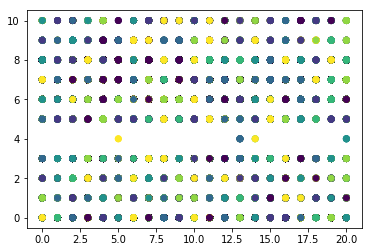

In [123]:
%pylab inline
plt.scatter(df_accs_lab['DISTRITO'],df_accs_lab['TIPO_ACCIDENTE'],c=df_accs_lab['DIA_SEMANA'])

In [81]:
####### FINAL